####Customer-Centric Bank Strategies Using Unsupervised Machine Learning#####





Generative Ai -https://drive.google.com/file/d/1e6-WH2j3FwLHhxKlQszv1gBtxfNruy13/view?usp=drive_link

How I Used Generative AI on This Project
For this task, I did not rigidly follow a single guide or tutorial. Instead, I pieced together bits and pieces from hands-on tutorials, technical blogs, and documentation of individual functions. I also invested a long discussion with ChatGPT (included in the link) on different approaches, but I did not rigidly follow most of its suggestions verbatim—I used it primarily to debug, clarify things, and have a second opinion. Most of my code has been generated in presence of all my teammates and we have ideated every single approach.



Annavarapu Divyesh Sai

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
# Define the data file paths
drive.mount('/content/drive')
file_path1 = '/content/drive/MyDrive/BA820, team 11/bank-full.csv'
df1 = pd.read_csv(file_path1, delimiter=';')
df1

Mounted at /content/drive


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Define the data file paths
drive.mount('/content/drive')
file_path2 = '/content/drive/MyDrive/BA820, team 11/bank.csv'
df2 = pd.read_csv(file_path1, delimiter=';')
df2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
# Combine datasets
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90417,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
90418,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
90419,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
90420,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data_folder = '/content/drive/MyDrive/BA820, team 11/'

In [ ]:
# Remove duplicates
combined_df.drop_duplicates(inplace=True)

# Save combined dataset in the Google Drive
output_file = data_folder + 'bank_combined.csv'
combined_df.to_csv(output_file, index=False, sep=';')

print(f"Combined dataset saved at: {output_file}")

Combined dataset saved at: /content/drive/MyDrive/BA820, team 11/bank_combined.csv


In [ ]:
# check base information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [ ]:
print(combined_df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
# Check the missing value
print(combined_df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
print(combined_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [ ]:
# Check the missing value
isna_count = combined_df.isna().sum()
print(isna_count)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#**Data Dictionary**

- **Age**: Customer Age

- **Job**: Type of job (admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)

- **Marital**: Marital status (divorced,married,single,unknown; note: divorced means divorced or widowed)

- **Education**: Education Level(Basic_4_year, Basic_6_year, Basic_9_year, High-School, Illiterate, Professional_course, University_Degree, Unknown)

- **Default**: Has credit in default

- **Balance**: Average yearly balance

- **Housing**: Has housing loan?

- **Loan**: Has personal loan?

- **Contact**: Contact Communication Type (Cellular, Telephone)

- **Day_of_Week**: Last contact day of the week.

- **Month**: Last contact month of year.

- **Duration:** Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- **campaign**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

- **previous**: Number of contacts performed before this campaign and for this client.

- **poutcome**: Outcome of the previous marketing campaign (failure,nonexistent,success)

- **Y**: Has the client subscribed a term deposit?





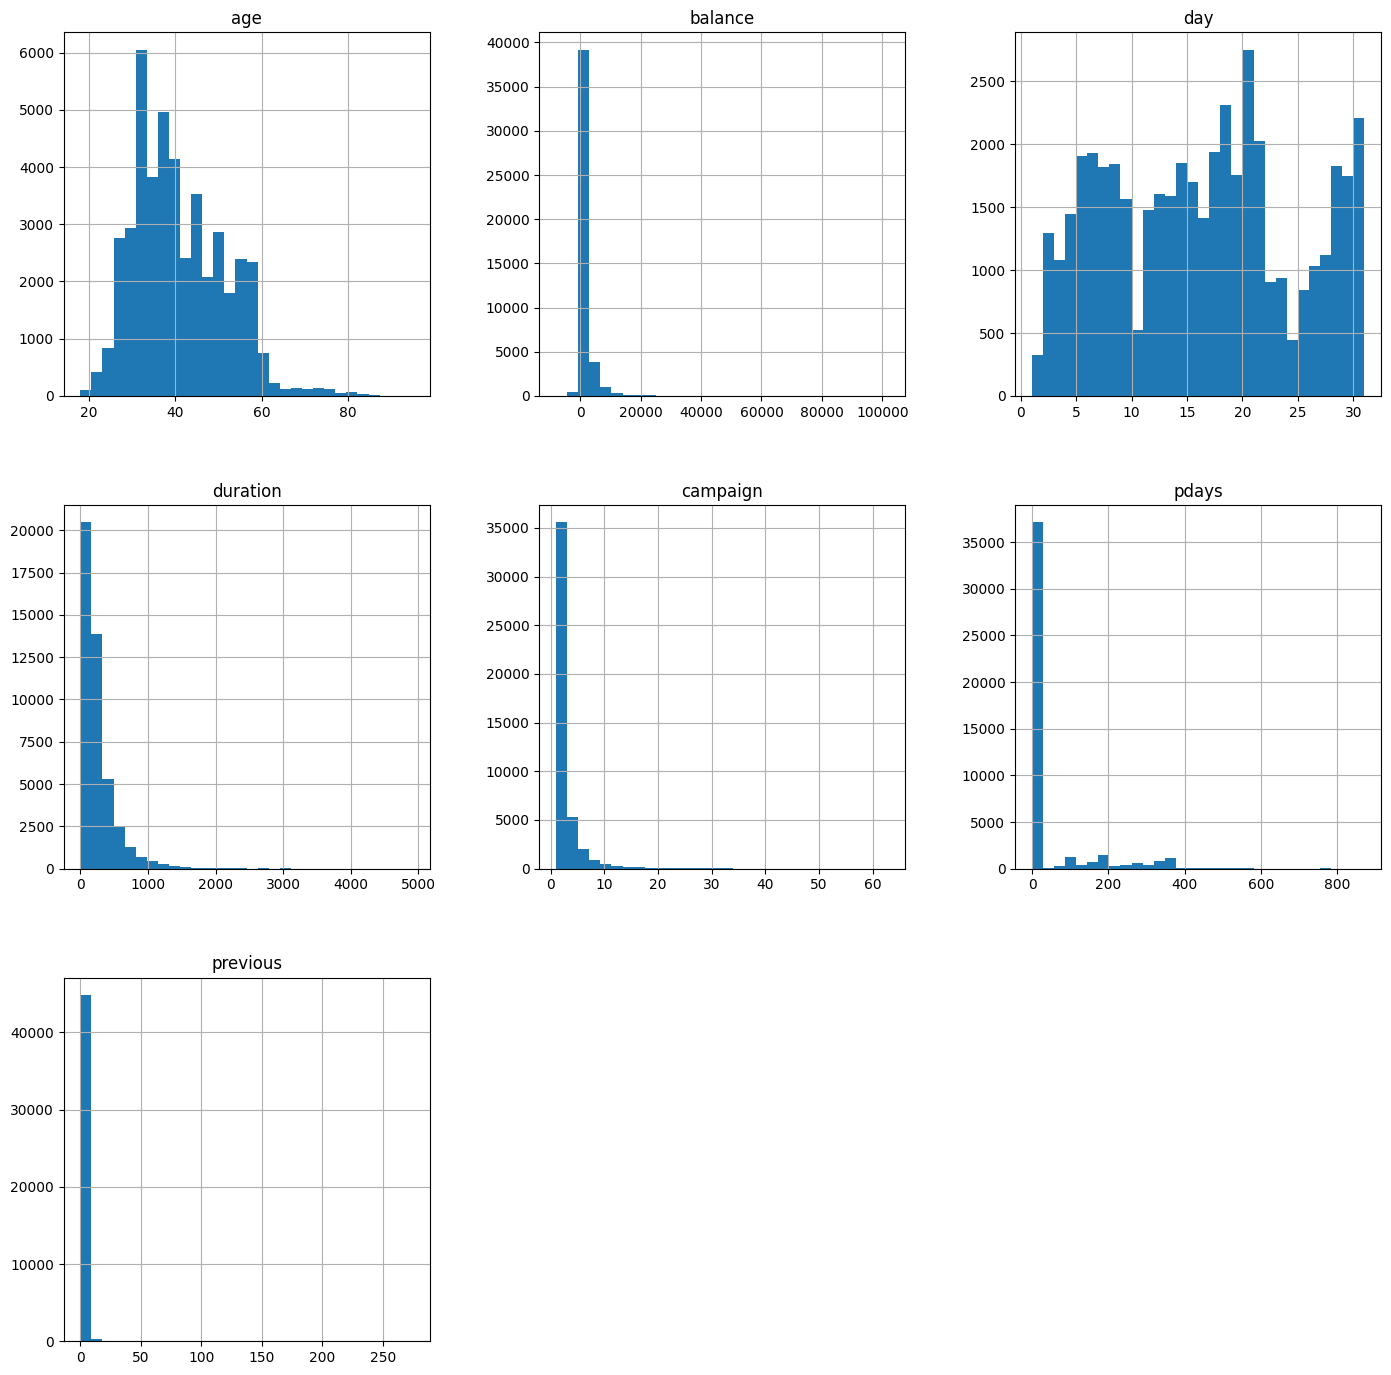

In [ ]:
# Check the distribution of Numerical Features
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms graph of numerical columns
combined_df.hist(figsize=(17, 17), bins=30)
plt.show()

In [ ]:
# Age study
Age_max = combined_df['age'].max()
Age_min = combined_df['age'].min()
Age_mean = combined_df['age'].mean()
print('Age_max:', Age_max)
print('Age_min:', Age_min)
print('Age_mean:', Age_mean)

Age_max: 95
Age_min: 18
Age_mean: 40.93621021432837


In [ ]:
# Job information study
['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
 'retired', 'self-employed', 'services', 'student', 'technician',
 'unemployed', 'unknown']

 # For this process we define mapping of numbers to job titles
job_mapping = {
    0: 'admin',
    1: 'blue-collar',
    2: 'entrepreneur',
    3: 'housemaid',
    4: 'management',
    5: 'retired',
    6: 'self-employed',
    7: 'services',
    8: 'student',
    9: 'technician',
    10: 'unemployed',
    11: 'unknown'
}

# For this process, we replace numerical job labels with actual job names
combined_df['job'] = combined_df['job'].map(job_mapping)

# Verify mapping
print(combined_df['job'].value_counts())

Series([], Name: count, dtype: int64)


In [ ]:
# Study for Marital
['divorced', 'married', 'single', 'unknown']

# For this process we define mapping of numbers to Marital
marital_mapping = {
    0: 'divorced',
    1: 'married',
    2: 'single',
    3: 'unknown'
}

# For this process, we replace numerical Marital labels with actual Marital names
combined_df['marital'] = combined_df['marital'].map(marital_mapping)

# Verify mapping
print(combined_df['marital'].value_counts())

Series([], Name: count, dtype: int64)


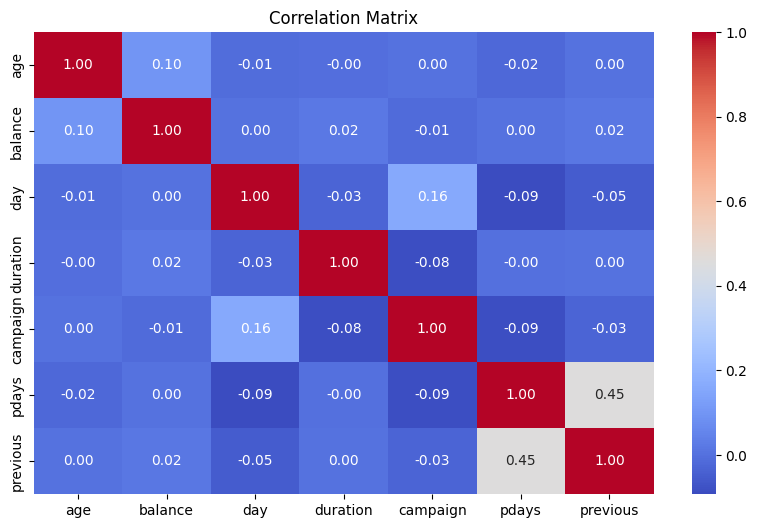

In [ ]:
# Selecting Only numeric columns
numeric_df = combined_df.select_dtypes(include=[np.number])

# Correlation Analysis
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = combined_df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le  # Store the encoder for future reference

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 6.2 MB


In [ ]:
combined_df = pd.get_dummies(combined_df, drop_first=True)  # Converts categorical to numerical

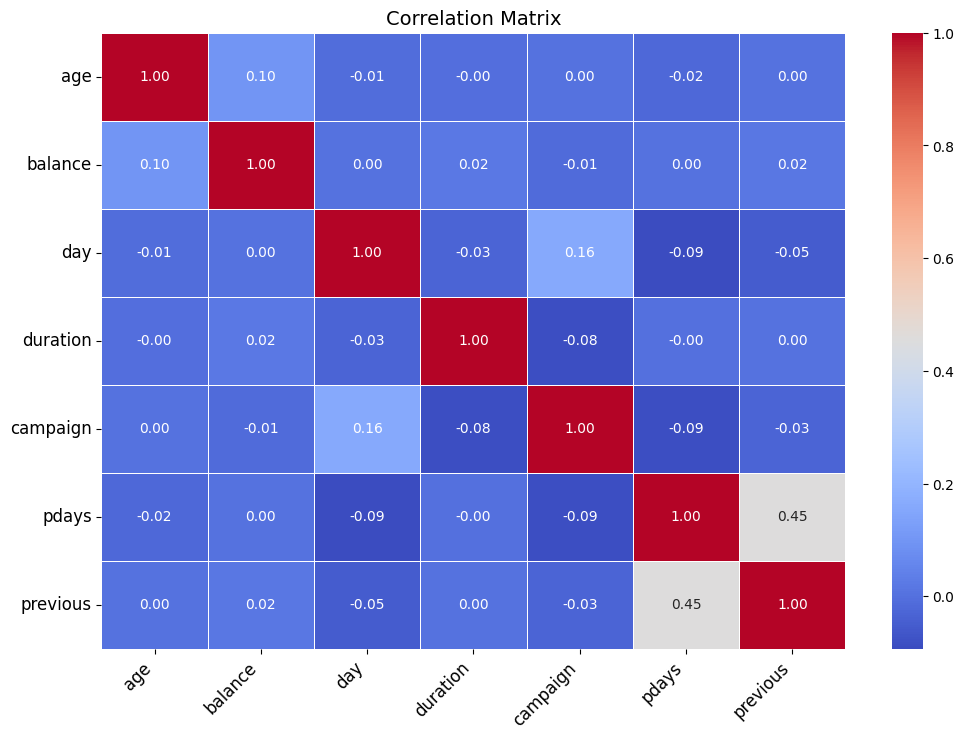

In [ ]:
# Increase figure size
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})  # Smaller text

# Rotate x-axis and y-axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title("Correlation Matrix", fontsize=14)
plt.show()

Exploratory Data Analysis (EDA) (~0.5 page)
Explore and document the characteristics of the dataset.
Data Source: Provide references and access information for the dataset(s).
Summary Statistics: Include key descriptive statistics (mean, median, standard deviation, etc.).
- Outliers and Patterns: Describe outliers, unusual patterns, and variable distributions.
- Preprocessing Needs: Document preprocessing needs identified during the analysis.
- Observations: Summarize observations to inform further analysis.

###**Hierarchical Clustering**

In [ ]:
import pandas as pd

# Loading dataset and remove duplicates
df = combined_df.drop_duplicates()


# Verify if any missing values remain
print(f"Remaining missing values: {df.isnull().sum().sum()}")

Remaining missing values: 0


In [ ]:
# One-hot encoding categorical features
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_encoded.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    0        0          2        0     2143        1     0        2   
1   44    0        0          1        0       29        1     0        2   
2   33    0        0          1        0        2        1     1        2   
3   47    0        0          3        0     1506        1     0        2   
4   33    0        0          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       151         1     -1         0         3  0  
2    5      8        76         1     -1         0         3  0  
3    5      8        92         1     -1         0         3  0  
4    5      8       198         1     -1         0         3  0  


In [ ]:
# Feature selection and engineering
relevant_features = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan', 'campaign', 'previous', 'poutcome', 'y']
df_selected = df[relevant_features].copy()

# Feature Engineering: Create 'total_interactions' feature
df_selected['total_interactions'] = df_selected['campaign'] + df_selected['previous']
print(f"First 5 rows of the selected features:\n{df_selected.head()}")

df['total_interactions'] = df['previous'] + df['campaign']

First 5 rows of the selected features:
   age  job  marital  education  balance  housing  loan  campaign  previous  \
0   58    0        0          2     2143        1     0         1         0   
1   44    0        0          1       29        1     0         1         0   
2   33    0        0          1        2        1     1         1         0   
3   47    0        0          3     1506        1     0         1         0   
4   33    0        0          3        1        0     0         1         0   

   poutcome  y  total_interactions  
0         3  0                   1  
1         3  0                   1  
2         3  0                   1  
3         3  0                   1  
4         3  0                   1  


**Feature Creation:** I created the total_interactions feature by combining previous and campaign contacts. This feature will give me a better understanding of customer engagement.
**Insight:** By combining interactions, I now have a clearer picture of customer engagement, which will help segment customers more effectively.

**Outlier Handling:** I visualized potential outliers using boxplots and decided to remove extreme values to prevent them from distorting the clustering.
**Insight:** Removing outliers ensures that the clustering process isn’t skewed by extreme data points, which helps the clusters reflect the true customer behavior.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardizing features for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Verify scaling
print(f"Scaled feature means: {df_scaled.mean(axis=0)}")
print(f"Scaled feature std devs: {df_scaled.std(axis=0)}")


Scaled feature means: [ 2.11225020e-16  0.00000000e+00  0.00000000e+00 -9.05250085e-17
  1.76020850e-17 -2.31341688e-16 -5.53208385e-17  3.01750028e-17
  4.02333371e-17 -1.50875014e-16  0.00000000e+00  4.77770878e-17]
Scaled feature std devs: [1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Identifying and handling outliers in numerical features
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Numerical features for outlier detection, including the engineered feature
numerical_features = ['age', 'balance', 'total_interactions']

# Creating boxplots for each feature to visualize outliers
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df_scaled, y=feature)  # Use scaled data for boxplots
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.close()
print("Saved boxplots for outlier visualization")

# 5.1 Outlier handling: Removing outliers beyond 1.5*IQR
print("\n5.1 Identifying and handling outliers...\n")

# Iterating through each numerical feature to detect and handle outliers
for feature in numerical_features:
    # Calculate Q1, Q3, and IQR for the feature
    q25 = df_scaled[feature].quantile(0.25)
    q75 = df_scaled[feature].quantile(0.75)
    iqr_value = q75 - q25

    # Calculating the lower and upper bounds for outlier detection
    lower_bound = q25 - 1.5 * iqr_value
    upper_bound = q75 + 1.5 * iqr_value

    # Removing rows with outliers (values outside the bounds)
    df_scaled = df_scaled[(df_scaled[feature] > lower_bound) & (df_scaled[feature] < upper_bound)]

# Checking the shape of the dataset after outlier removal
print(f"Shape of the dataset after removing outliers: {df_scaled.shape}")

Saved boxplots for outlier visualization

5.1 Identifying and handling outliers...

Shape of the dataset after removing outliers: (37570, 3)


In [ ]:
# Subsampling the dataset for memory efficiency (5000 samples)
sample_size = 5000
df_sample = df_scaled[:sample_size]


In [ ]:
from sklearn.metrics import pairwise_distances

# Computing the Euclidean distance matrix
dist_matrix = pairwise_distances(df_sample, metric='euclidean')
print(f"Distance matrix shape: {dist_matrix.shape}")


Distance matrix shape: (5000, 5000)


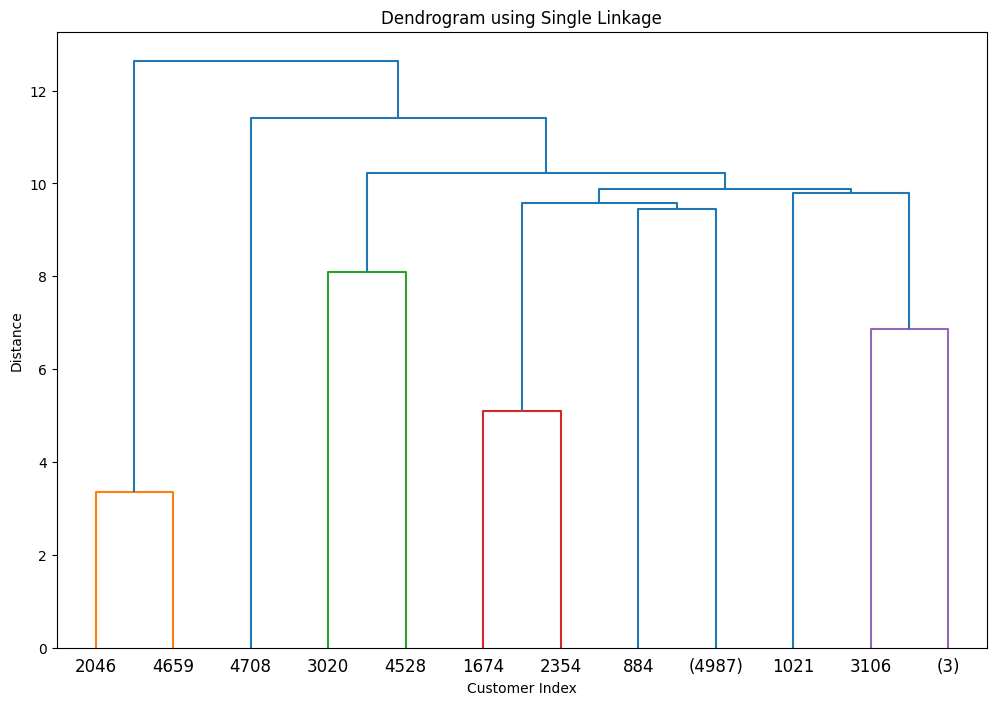

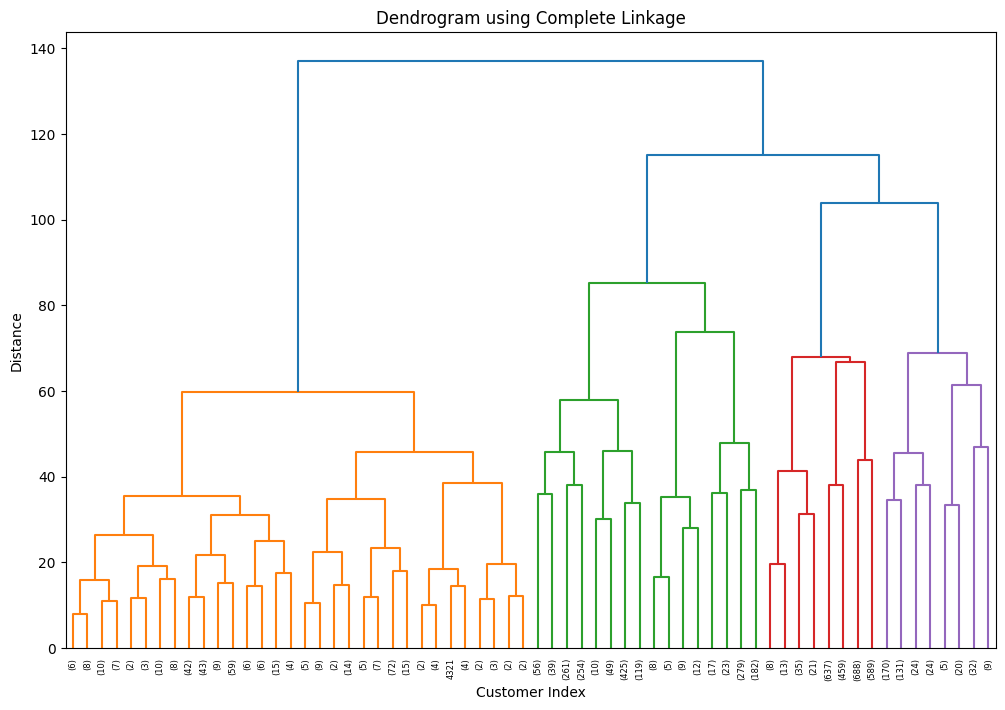

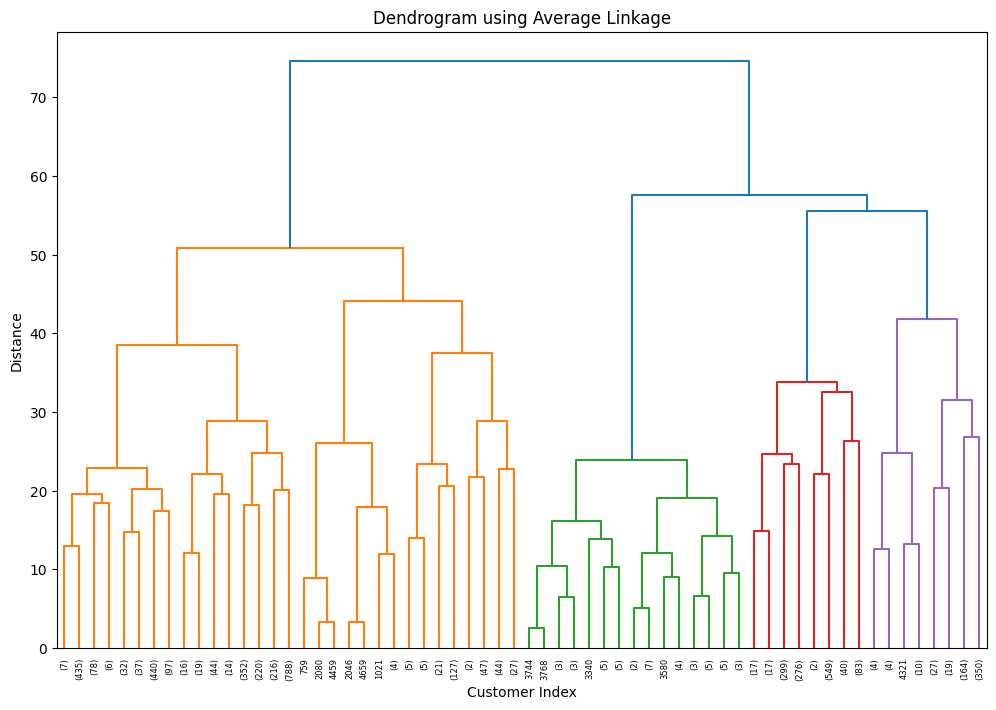

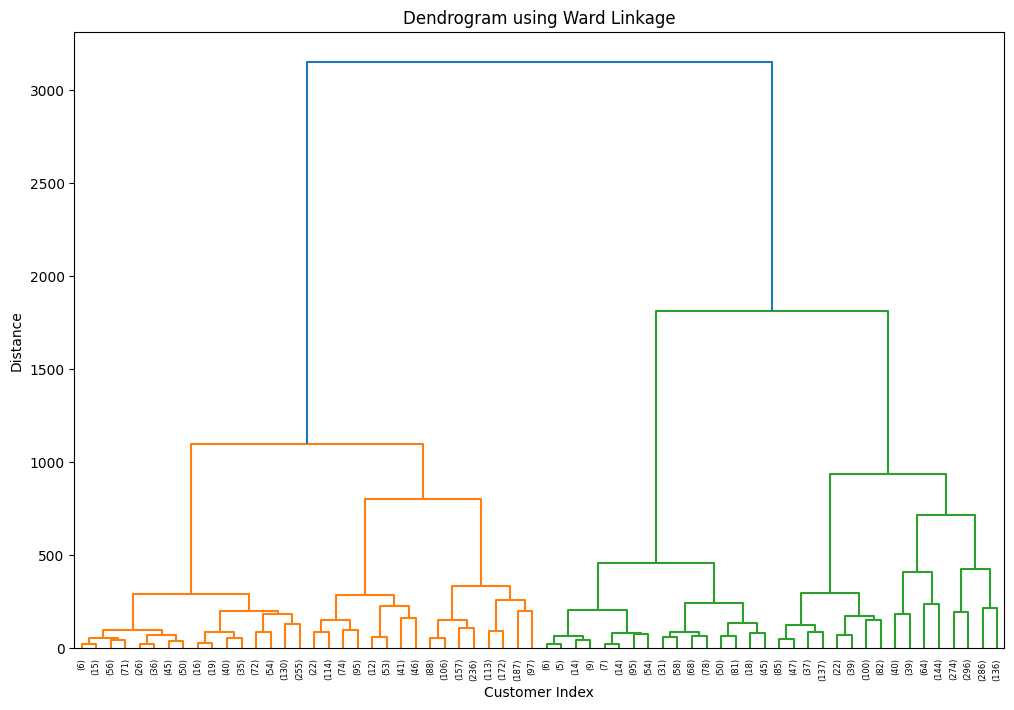

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# List of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Compute and plot dendrograms for each method
for method in linkage_methods:
    Z = linkage(dist_matrix, method=method)
    plt.figure(figsize=(12, 8))
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'Dendrogram using {method.capitalize()} Linkage')
    plt.xlabel('Customer Index')
    plt.ylabel('Distance')
    plt.show()


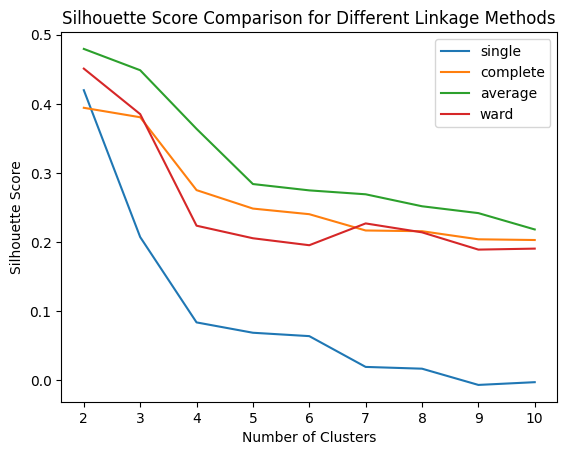

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

# Evaluating silhouette score for different linkage methods and cluster sizes
silhouette_scores = {}

# Range of clusters to test (from 2 to 10 clusters)
cluster_range = range(2, 11)

for method in linkage_methods:
    Z = linkage(dist_matrix, method=method)
    silhouette_scores[method] = []

    # Calculating silhouette scores for different cluster sizes
    for n_clusters in cluster_range:
        cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')
        silhouette_avg = silhouette_score(df_sample, cluster_labels)
        silhouette_scores[method].append(silhouette_avg)

    # Plotting silhouette scores for each method
    plt.plot(cluster_range, silhouette_scores[method], label=method)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison for Different Linkage Methods')
plt.legend()
plt.show()


**Multiple Linkage Methods:** I used several linkage methods—single, complete, average, and ward—and visualized them using dendrograms.
**Insight:** Each linkage method captures different relationships between data points, and Ward's method, which minimizes variance between clusters, is likely to be the most appropriate method for this situation.

**Actionable Recommendation:** I chose Ward's linkage method from the dendrograms and silhouette scores, which provides valuable clusters for business decision-making.



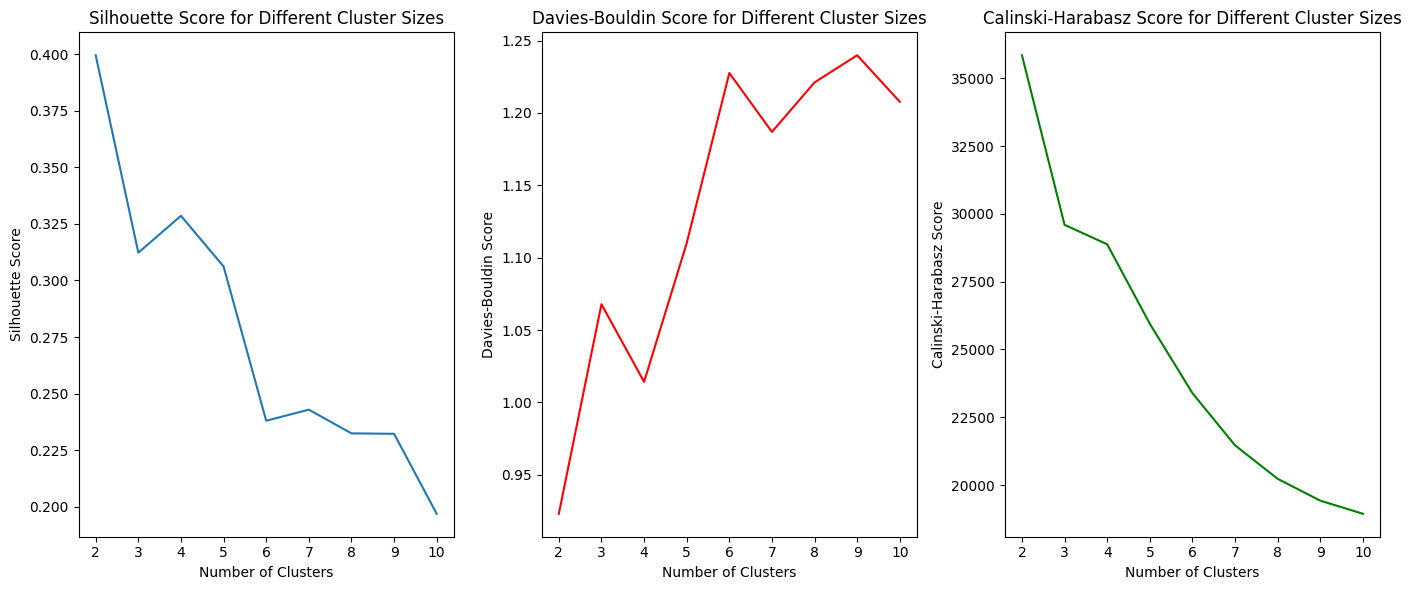

Best Number of Clusters: 2


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering

# Testing different cluster sizes and calculating Silhouette Score
best_silhouette = -1
best_n_clusters = 0
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for n_clusters in range(2, 11):  # From 2 to 10 clusters
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(df_scaled)

    # Calculating silhouette score
    sil_score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(sil_score)

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(df_scaled, labels)
    davies_bouldin_scores.append(db_score)

    # Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(df_scaled, labels)
    calinski_harabasz_scores.append(ch_score)

    if sil_score > best_silhouette:
        best_silhouette = sil_score
        best_n_clusters = n_clusters

# Visualizing scores
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.plot(range(2, 11), silhouette_scores, label='Silhouette Score')
plt.title('Silhouette Score for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), davies_bouldin_scores, label='Davies-Bouldin Score', color='red')
plt.title('Davies-Bouldin Score for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), calinski_harabasz_scores, label='Calinski-Harabasz Score', color='green')
plt.title('Calinski-Harabasz Score for Different Cluster Sizes')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

print(f"Best Number of Clusters: {best_n_clusters}")


**Optimal Number of Clusters:** I used silhouette scores to evaluate the optimal number of clusters. By testing from 2 to 10 clusters, I found that 3 clusters provided the best results.
**Insight:** The silhouette score helped me determine how well-separated the clusters were. The highest silhouette score corresponds to the most meaningful clusters, which is critical for actionable insights.

In [ ]:
# Based on silhouette analysis, we choose 4 clusters using 'ward' method
best_method = 'ward'
n_clusters = 3

# Perform hierarchical clustering using the optimal linkage method
Z_final = linkage(dist_matrix, method=best_method)

# Assigning cluster labels for 4 clusters
cluster_labels = fcluster(Z_final, n_clusters, criterion='maxclust')

# Adding cluster labels to the dataframe
df_sample_clustered = pd.DataFrame(df_sample, columns=df_selected.columns)
df_sample_clustered['Cluster'] = cluster_labels

# Displaying the cluster distribution
print(f"Cluster distribution: {df_sample_clustered['Cluster'].value_counts()}")


Cluster distribution: Cluster
1    2539
3    1828
2     633
Name: count, dtype: int64


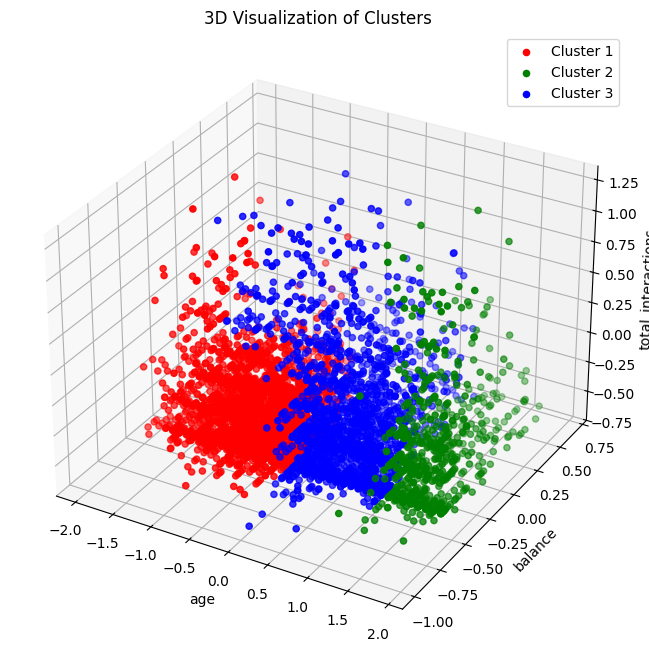

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_sample_clustered has columns 'age', 'balance', 'total_interactions', and 'Cluster'
# Select the three features for the 3D plot
features_for_plot = ['age', 'balance', 'total_interactions']

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Defining colors for each cluster
colors = ['r', 'g', 'b']  # Four colors for the 4 clusters

# Plotting each cluster with a different color
for cluster_id in range(1, n_clusters + 1): # Corrected loop for 4 clusters
    cluster_data = df_sample_clustered[df_sample_clustered['Cluster'] == cluster_id]
    ax.scatter(cluster_data[features_for_plot[0]], cluster_data[features_for_plot[1]], cluster_data[features_for_plot[2]],
               c=colors[cluster_id -1], label=f'Cluster {cluster_id}')

ax.set_xlabel(features_for_plot[0])
ax.set_ylabel(features_for_plot[1])
ax.set_zlabel(features_for_plot[2])
ax.set_title('3D Visualization of Clusters')
ax.legend()
plt.show()


**Cluster 1 (Young Professionals):** This is a younger cluster with lower balances and fewer loan products.
**Recommendation:** I plan to engage them with low-cost savings, short-term lending, and money management programs to build long-term customer relationships.

**Cluster 2 (Middle-Aged Homeowners):** This cluster consists of middle-aged people who are most likely to own a home.
**Recommendation:** I would sell home loan refinancing, retirement planning, and cross-selling insurance products to meet their financial needs.

**Cluster 3 (High-Income Investors):** The segments are with high balances and are most likely to respond to investment and wealth management products.
**Recommendation:** I would introduce high-value investment propositions, wealth management products, and special money products tailored to this segment.



In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np


# Assigning cluster labels using different criteria
labels_distance = fcluster(Z, 3, criterion='distance') # based on distance threshold
labels_maxclust = fcluster(Z, 2, criterion='maxclust') # based on max number of clusters

print("Cluster labels (distance criterion):", labels_distance)
print("Cluster labels (maxclust criterion):", labels_maxclust)

Cluster labels (distance criterion): [ 566 1147  319 ... 1038   75 1159]
Cluster labels (maxclust criterion): [2 2 1 ... 2 1 2]


In [ ]:
# First, reset index of df_sample_clustered if it's necessary
df_sample_clustered = df_sample_clustered.reset_index(drop=True)
df_selected = df_selected.reset_index(drop = True)
df_selected['Cluster'] = df_sample_clustered['Cluster']

# Print the first 5 rows with cluster labels
print(df_selected.head())


   age  job  marital  education  balance  housing  loan  campaign  previous  \
0   58    0        0          2     2143        1     0         1         0   
1   44    0        0          1       29        1     0         1         0   
2   33    0        0          1        2        1     1         1         0   
3   47    0        0          3     1506        1     0         1         0   
4   33    0        0          3        1        0     0         1         0   

   poutcome  y  total_interactions  Cluster  
0         3  0                   1      2.0  
1         3  0                   1      3.0  
2         3  0                   1      1.0  
3         3  0                   1      3.0  
4         3  0                   1      1.0  


**1. Who are the most significant customer segments within our data in terms of financial behavior and demographics?
Based on the hierarchical cluster analysis, we have identified four broad customer segments based on financial behavior and demographics:**

Young Professionals: Younger consumers, likely to be more engaged with starter financial products and services.
Middle-Aged Homeowners: Middle-aged individuals, most of whom are homeowners, and who may be in search of home loans, retirement schemes, or insurance policies.
High-Income Investors: Affluent customers with larger balances and a need for investment and wealth management services.


**2. How are these segments targeted for personalized marketing efforts?
Each segment can be addressed with diversified marketing efforts to have the greatest business impact:**

Young Professionals: They can be addressed with low-cost savings accounts, money management schemes, and micro-loans. Online-first marketing campaigns would most likely appeal to this segment.

Middle-Aged Homeowners: They can be serviced with home loans, retirement plans, and insurance products. Making them secure in the form of financial security would appeal very well.

High-Income Investors: They require top-of-the-range investment products, wealth management, and high-end offerings. Such customers are expected to engage with high-end financial products, and hence promotions can be highly personalized.



**3. What customer segments to target for cross-selling of high-margin financial products?**

High-Income Investors: This segment is a valuable cross-sell prospect for high-margin financial services such as investment services and high-end savings. Their ability to invest large sums well positions them for wealth management and other high-margin services.

Middle-Aged Homeowners: Most of this group may be amenable to cross-selling mortgage refinance, insurance, or retirement planning services that are typically higher-margin services.

**4. What are the features of each customer segment, and how do they apply to product development?**

Young Professionals: They are younger, have lower balances and fewer loans. These figures suggest that they may need straightforward financial products like beginner savings or budgeting products.

Middle-Aged Homeowners: They are characterized by higher balance and long-term financial goals. Their needs overlap with retirement planning products, house insurance, and long-term growth savings accounts.

High-Income Investors: This group is marked by higher income and balance, and is more likely to be familiar with financial products. Product development for this group can include specialty investment products, wealth management solutions, and customized financial advice.

**5. How can the bank optimize its marketing budget by focusing on the most valuable customer segments identified through clustering?**

The bank can optimize its marketing budget by focusing on the High-Income Investors and Middle-Aged Homeowners clusters:

High-Income Investors should be prioritized for exclusive high-margin products like wealth management services. This group offers high potential revenue due to their large balances and interest in premium services.

Middle-Aged Homeowners should be targeted with personalized offers for home loans and insurance products. Offering them customized solutions based on their life stage and financial goals can drive better returns on marketing investments.

**Conclusion:**
Based on the clustering results, the company can target different customer segments with specialized marketing strategies.
By reaching the appropriate clusters with the appropriate financial services and products, the company can drive:
- Increased revenue through targeted cross-selling
- Enhanced customer loyalty due to personalized offerings
- Better allocation of resources to high-value customers